In [ ]:
from zipfile import ZipFile

zip_path = "/content/images.zip"


extract_path = "/content/CNN"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")

Unzipping completed!


CNN

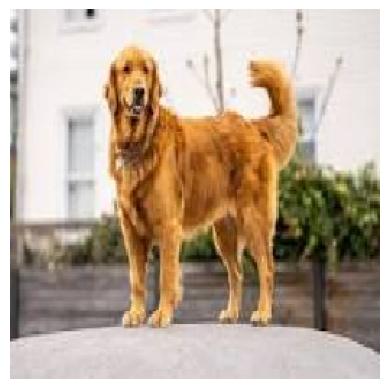

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Prediction: Dog


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 256
BATCH_SIZE = 3
EPOCHS = 2

image_path = "/content/download (7).jfif"
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

plt.imshow(image)
plt.axis('off')
plt.show()


model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



prediction = model.predict(image_array)
predicted_class = "Dog" if prediction[0][0] > 0.5 else "Not a Dog"

print(f"Prediction: {predicted_class}")

ANN


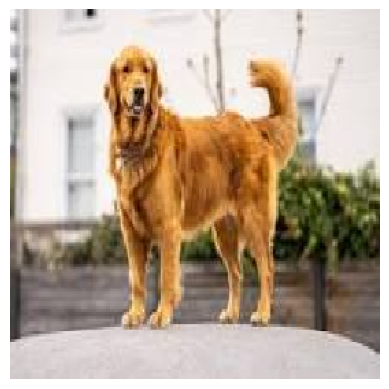

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Prediction: Not a Dog


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 270
BATCH_SIZE = 3
EPOCHS = 100

image_path = "/content/download (7).jfif"
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

plt.imshow(image)
plt.axis('off')
plt.show()

# Flattening the image before passing it to ANN
image_array = image_array.reshape(1, -1)

model = Sequential([
    Dense(units=512, activation='relu', input_shape=(IMG_SIZE * IMG_SIZE * 3,)),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

prediction = model.predict(image_array)
predicted_class = "Dog" if prediction[0][0] > 0.5 else "Not a Dog"

print(f"Prediction: {predicted_class}")

ANN FOR IMAGE

Found 13669 images belonging to 3 classes.
Found 835 images belonging to 3 classes.
Epoch 1/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.3897 - loss: 2.0429 - val_accuracy: 0.4754 - val_loss: 1.0142
Epoch 2/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4755 - loss: 1.0341 - val_accuracy: 0.5102 - val_loss: 1.0029


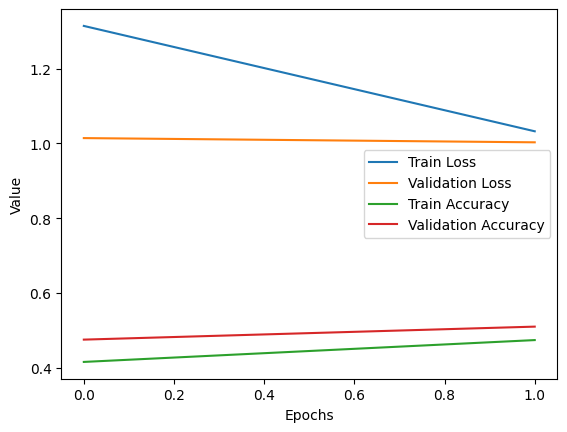

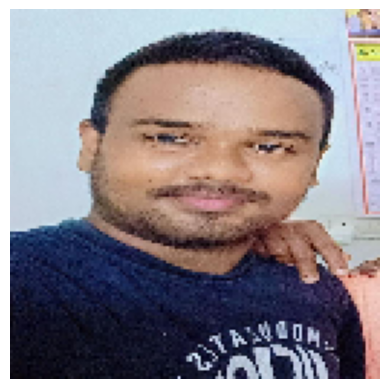

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Prediction: happy


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 5


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "/content/CNN/images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/CNN/images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

num_classes = train_data.num_classes

model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, validation_data=val_data, epochs=2, verbose=1)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


def predict_image(image_path, model, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}  # reverse class_indices

    print(f"Prediction: {class_labels[predicted_class_index]}")


predict_image("/content/WhatsApp Image 2025-04-06 at 2.48.52 PM.jpeg", model, train_data.class_indices)

Found 13669 images belonging to 3 classes.
Found 835 images belonging to 3 classes.
Epoch 1/2
855/855 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.3891 - loss: 1.1436 - val_accuracy: 0.4455 - val_loss: 1.1208
Epoch 2/2
855/855 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.4585 - loss: 1.0677 - val_accuracy: 0.2719 - val_loss: 1.1041


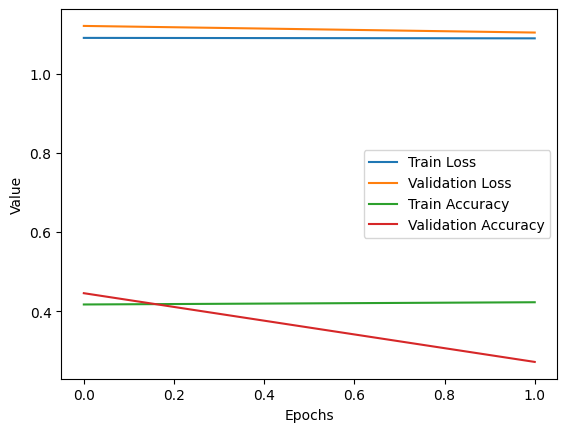

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMG_SIZE = 256
BATCH_SIZE = 16
EPOCHS = 2

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "/content/CNN/images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/CNN/images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

num_classes = train_data.num_classes

model = Sequential([


    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu',
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),


    Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),


    Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='leaky_relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),

    Flatten(),


    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='tanh'),
    Dropout(0.3),


    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, verbose=1)



plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

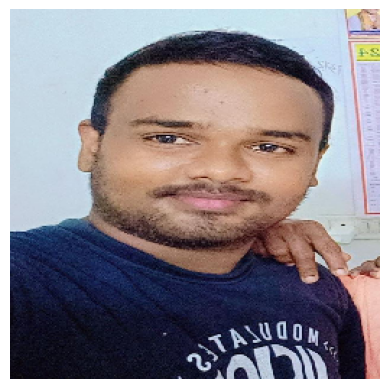

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Prediction: Sad


In [ ]:
def predict_image(image_path, model, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}

    print(f"Prediction: {class_labels[predicted_class_index].capitalize()}")

predict_image("/content/WhatsApp Image 2025-04-06 at 2.48.52 PM.jpeg", model, train_data.class_indices)

Found 13669 images belonging to 3 classes.
Found 835 images belonging to 3 classes.
Epoch 1/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - accuracy: 0.3952 - loss: 1.1448 - val_accuracy: 0.4371 - val_loss: 1.0768
Epoch 2/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.4253 - loss: 1.0829 - val_accuracy: 0.4371 - val_loss: 1.0760


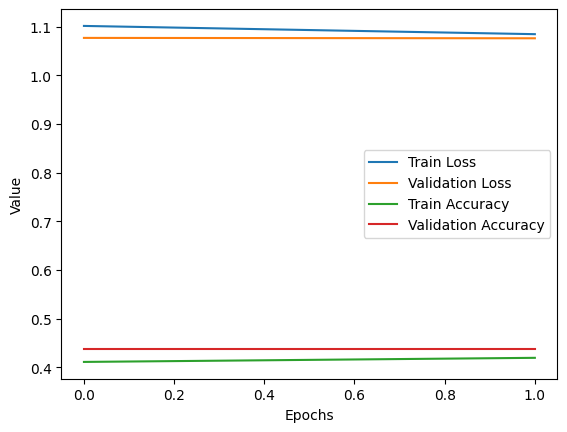

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 2


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "/content/CNN/images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/CNN/images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)


mode = Model(inputs=base_model.input, outputs=predictions)

mode.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = mode.fit(train_data, validation_data=val_data, epochs=EPOCHS, verbose=1)


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()




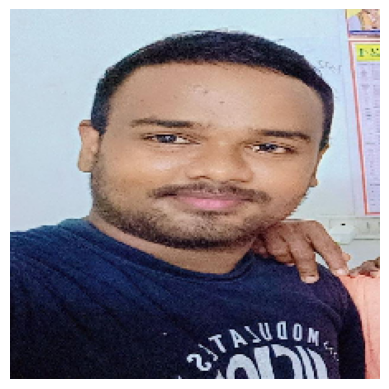

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Happy


In [ ]:
def predict_image(image_path, mode, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = mode.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}

    print(f"Prediction: {class_labels[predicted_class_index].capitalize()}")

predict_image("/content/WhatsApp Image 2025-04-06 at 2.48.52 PM.jpeg", mode, train_data.class_indices)
